In [33]:
import json
import requests
import os


import requests as req

import pandas as pd
import math as math
import time
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress
from citipy import citipy
api_key = "4f1b0e54c7b3f13059687c88c9e9702d"
temp_units = "imperial"

In [34]:
# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [35]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)

613


In [36]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
df = pd.DataFrame(columns=['City','Lat','Lan','Temp_max', 'Hum','Cloudness','WindSpeed','Country','Date'])
#                   ,'Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
for city in cities:

    counter += 1  

    city_url = base_url + '&q=' + city.replace(' ','+')

    r = requests.get(city_url)
    if r:
        data = r.json()
#         print(data)
        lat = data['coord']['lat']
        lan = data['coord']['lon']
        hum = data['main']['humidity']
        tmp_m = data['main']['temp_max']
        cloud = data['clouds']['all']
        WS = data['wind']['speed']
        Cntry = data['sys']['country']
        Dt = data['dt']
        df.loc[counter] = [city, lat, lan,tmp_m, hum, cloud, WS,Cntry, Dt]
    else:
        print("The city is not on the list.")
print('---------------------')
print('Data Retrieval Complete')
print(f"There are {counter-1} records.")
df

Beginning Data Retrieval
---------------------
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the li

,City,Lat,Lan,Temp_max,Hum,Cloudness,WindSpeed,Country,Date
2,bejar,40.3864,-5.7634,57,44,73,3,ES,1617247720
3,lebu,-37.6167,-73.6500,56.61,93,34,11.77,CL,1617247720
4,faanui,-16.4833,-151.7500,82.87,68,100,5.64,PF,1617247720
5,garissa,-0.4536,39.6401,78.13,84,60,11.32,KE,1617247721
6,busselton,-33.6500,115.3333,76.84,55,100,4.47,AU,1617247721
...,...,...,...,...,...,...,...,...,...
610,gap,44.6667,6.0000,46.99,73,98,7,FR,1617247828
611,xinyu,27.8043,114.9334,68.41,94,100,5.26,CN,1617247828
612,kloulklubed,7.0419,134.2556,87.8,70,75,11.5,PW,1617247828
613,hellvik,59.9156,5.7810,37,90,45,3,NO,1617247828


In [38]:
data

{'coord': {'lon': 121.8233, 'lat': 24.8592},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 82.02,
  'feels_like': 94.3,
  'temp_min': 81,
  'temp_max': 84,
  'pressure': 1001,
  'humidity': 99},
 'visibility': 10000,
 'wind': {'speed': 3.06, 'deg': 129, 'gust': 4.34},
 'clouds': {'all': 97},
 'dt': 1617247828,
 'sys': {'type': 3,
  'id': 256500,
  'country': 'TW',
  'sunrise': 1617227068,
  'sunset': 1617271710},
 'timezone': 28800,
 'id': 1674199,
 'name': 'Toucheng',
 'cod': 200}

In [39]:
df.count()

City         563
Lat          563
Lan          563
Temp_max     563
Hum          563
Cloudness    563
WindSpeed    563
Country      563
Date         563
dtype: int64

In [40]:
df_dirty = df[(df["Hum"] > 100)].index
df_dirty

Int64Index([], dtype='int64')

In [41]:
df = df.drop(df_dirty, inplace=False)
df.head()

,City,Lat,Lan,Temp_max,Hum,Cloudness,WindSpeed,Country,Date
2,bejar,40.3864,-5.7634,57,44,73,3,ES,1617247720
3,lebu,-37.6167,-73.6500,56.61,93,34,11.77,CL,1617247720
4,faanui,-16.4833,-151.7500,82.87,68,100,5.64,PF,1617247720
5,garissa,-0.4536,39.6401,78.13,84,60,11.32,KE,1617247721
6,busselton,-33.6500,115.3333,76.84,55,100,4.47,AU,1617247721


In [42]:
# Export the City_Data into a csv
df.to_csv(output_data_file, index_label="City_ID")

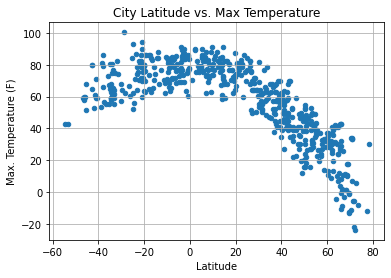

In [43]:
#Latitude vs. Temperature Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Temp_max"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

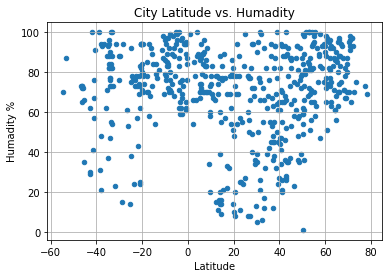

In [44]:
#Latitude vs. Humadity Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Hum"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humadity")
plt.ylabel("Humadity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Humadity_vs_Latitude.png")

# Show plot
plt.show()

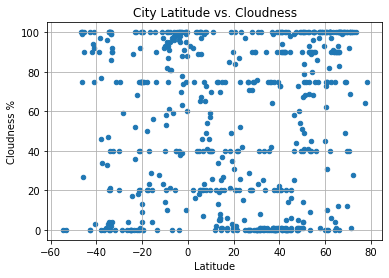

In [45]:
#Latitude vs. Cloudiness Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Cloudness"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudness")
plt.ylabel("Cloudness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Cloudness_vs_Latitude.png")

# Show plot
plt.show()

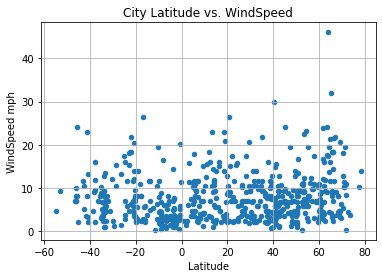

In [46]:
#Latitude vs. Wind Speed Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["WindSpeed"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. WindSpeed")
plt.ylabel("WindSpeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Windspeed_vs_Latitude.png")

# Show plot
plt.show()

In [47]:
N_df = df.loc[(df["Lat"] >= 0)]
S_df = df.loc[(df["Lat"] < 0)]

In [56]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = N_df["Lat"]
y_values = N_df["Temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

In [57]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = S_df["Lat"]
y_values = S_df["Temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

In [58]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = N_df["Lat"]
y_values = N_df["Hum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humadity')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

In [59]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = S_df["Lat"]
y_values = S_df["Hum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humadity')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

In [60]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = N_df["Lat"]
y_values = N_df["Cloudness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudness')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

In [61]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values =S_df["Lat"]
y_values =S_df["Cloudness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudness')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

In [62]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = N_df["Lat"]
y_values = N_df["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

In [63]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = S_df["Lat"]
y_values = S_df["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'